# Optical depth

The optical depth is defined as
$$
\tau = \int_0^{D_S} \frac{\rho(x)}{m} \, \pi u_T^2 R_E(x)^2 \, dx
$$
where we use $ x = \frac{D_L}{D_S} $, $ u_T = 1 $, and $ D_S = 8 \, \text{kpc} $.

The factor $ \frac{R_E(x)^2}{m} = \kappa D_S^2 x(1 - x) $ represents the squared Einstein radius scaled by the lens mass, where $ \kappa =\frac{4G}{c^2}$ is a constant.

The density profiles considered are as follows:

1. **Isothermal Sphere Density Profile**:
   $$
   \rho(x) = \frac{\rho_0 (R_\text{sol}^2 + R_c^2)}{R_c^2 + r(x)^2}
   $$
   where $ R_\text{sol} $ is the distance of the Sun from the Galactic center, $ R_c $ is the core radius, and $ r(x) $ gives the distance from the Galactic center to the lens at position $ x $.

2. **Navarro-Frenk-White (NFW) Density Profile**:
   $$
   \rho(x) = \frac{\rho_0}{\frac{r(x)}{R_s} \left(1 + \frac{r(x)}{R_s}\right)^2}
   $$
   where $ \rho_0 $ is a characteristic density, and $ R_s $ is the NFW scale radius.

In both cases, $ r(x) $ is given by
$$
r(x) = \sqrt{R_S^2 + (D_S x)^2 - 2 D_S R_s x \cos(l) \cos(b)}
$$
where $ l $ and $ b $ are the Galactic longitude and latitude of the source, respectively.


In [1]:
import numpy as np
import math
import astropy.units as u
import astropy.constants as c
from scipy.integrate import fixed_quad

def pos_sol(x):
    '''
    Calculates the position of the Sun relative to the Galactic center.

    Parameters:
    x (float): Fractional distance parameter, 0 ≤ x ≤ 1.

    Returns:
    r (Quantity): Distance of the Sun from the Galactic center in kiloparsecs.
    '''
    l = -32.8  # Galactic longitude in degrees
    b = 281  # Galactic latitude in degrees
    Ds = 55 * u.kpc  # Distance to the source in kiloparsecs
    angle = np.cos(math.radians(l)) * np.cos(math.radians(b))
    Rs = 8.5 * u.kpc  # Distance of the Sun from the Galactic center in kiloparsecs
    r = np.sqrt(Rs**2 + (Ds * x)**2 - 2 * Rs * (x * Ds) * angle)
    return r

def rho_NFW(r):
    '''    
    Navarro-Frenk-White (NFW) density profile for dark matter distribution.

    Parameters:
    r (Quantity): Distance from the Galactic center in kiloparsecs.

    Returns:
    density (Quantity): NFW density at distance r in units of solar masses per cubic kiloparsec.
    '''
    Rs = 21.5 * u.kpc  # Scale radius in kiloparsecs
    rho0 = 4.88e+6 * c.M_sun / u.kpc**3  # Characteristic density
    q = r / Rs
    bot = q * (1 + q)**2
    return rho0 / bot

def rho_iso(r):
    '''
    Isothermal sphere density profile.

    Parameters:
    r (Quantity): Distance from the Galactic center in kiloparsecs.

    Returns:
    density (Quantity): Density at distance r in units of solar masses per cubic kiloparsec.
    '''
    rho0 = 7.9e-3 * c.M_sun / (u.pc)**3  # Central density in solar masses per cubic parsec
    Rsol = 8.5 * u.kpc  # Solar distance to the Galactic center in kiloparsecs
    Rc = 5 * u.kpc  # Core radius in kiloparsecs
    top = rho0 * (Rsol**2 + Rc**2)
    bot = r**2 + Rc**2
    return top / bot

def Einstein_angle_sq_m(x):
    '''
    Computes the squared Einstein angle times the distance to the lens (Dl) times the lens mass (M).

    Parameters:
    x (float): Fractional distance parameter, 0 ≤ x ≤ 1.

    Returns:
    Quantity: Squared Einstein angle times Dl times M in units of meters squared kilograms.
    '''
    Ds = 55 * u.kpc  # Distance to the source in kiloparsecs
    k = 4 * c.G / c.c**2  # Constant related to the gravitational lensing effect
    return (k * x * (1 - x) * Ds**2)

def int_optical_depth(rho, x):
    '''
    Computes the integrand for optical depth calculation.

    Parameters:
    rho (function): Density function (either rho_NFW or rho_iso).
    x (float): Fractional distance parameter, 0 ≤ x ≤ 1.

    Returns:
    float: Integrand value for optical depth.
    '''
    r = pos_sol(x)
    einstein_radius_sq_m = Einstein_angle_sq_m(x)
    optical_depth_integrand = (np.pi * rho(r) * einstein_radius_sq_m)
    return optical_depth_integrand.decompose().value  # Strip units for integration

# Perform the integration over x from 0 to 1 using the fixed_quad method
optical_depth_iso, _ = fixed_quad(lambda x: int_optical_depth(rho_iso, x), 0, 1, n=10)
optical_depth_NFW, _ = fixed_quad(lambda x: int_optical_depth(rho_NFW, x), 0, 1, n=10)
print("Integrated Optical Depth (Isothermal Sphere):", optical_depth_iso)
print("Integrated Optical Depth (Navarro Frenk White):", optical_depth_NFW)


Integrated Optical Depth (Isothermal Sphere): 5.104534452369212e-07
Integrated Optical Depth (Navarro Frenk White): 3.943342232943051e-07


# Differential Event Rate

It is derived as the duration distribution of microlensing events:
\begin{equation}
    \frac{d\Gamma}{d\hat{t}}= 2D_S \int_{0}^{1}dx \frac{\rho(x)}{Mv_c^2}v_E^4 \, \exp{\left(-\frac{v_E^2}{v_c^2}\right)}
\end{equation}

The profile describing the halo objects of the galaxy will be given by an isotropic, isothermal, and non-singular sphere as follows:
\begin{equation}
    \rho_{isot}(R) = \rho_{\odot} \frac{R_{Sol}^2+R_C^2}{R_C^2+R^2} \,,
\end{equation}
with $\rho_{\odot} = 0.0097M_{\odot}\text{pc}^{-3}$, $R_C= 5$ kpc as the core radius of the galaxy, and $R_{Sol}=8.5$ kpc as the distance from the Sun to the center of the galaxy.

On the other hand, $v_E = R_E(x)/t_E$.

In [2]:
import numpy as np
#para las unidades
from astropy import units as u
from astropy import constants as C
#para graficar
import matplotlib.pyplot as plt
#barras de avance
from tqdm.auto import tqdm
#integracion
import scipy.integrate as integrate
from scipy.integrate import simps

In [3]:
def rE(m, x, D):
    ''' 
    Radio de Einstein.
    Entradas:
    m: masa de la lente.
    x: D_OL/D distancia a la lente normalizada por la distancia a la fuente.
    D: Distancia a la fuente.
    '''
    arg = (4*C.G*(m*C.M_sun)*(D*u.kpc)*x*(1-x)/(C.c**2)).decompose()
    rE = np.sqrt(abs(arg)).decompose()
    return rE

def r(x):
    '''
    Distancia a la fuente.
    Entradas:
    x: D_OL/D distancia a la lente normalizada por la distancia a la fuente.
    '''
    R0 = 8.5*u.kpc
    L = 50*u.kpc
    b, l = -32.8*(np.pi/180), 281*(np.pi/180)
    return np.sqrt((x*L)**2 +(R0)**2 - 2*R0*L*x*np.cos(b)*np.cos(l))

def rho(x):
    '''
    Perfil de esfera isoterma para los objetos del halo de la galaxia.
    '''
    R0 = 8.5*u.kpc
    Rc = 5*u.kpc
    return (0.0079*(R0**2+Rc**2)/(r(x)**2+Rc**2)*C.M_sun/u.pc**3).decompose()

def integrand(x,t,m):
    '''
    Integrando de la tasa de eventos diferencial.
    El objetivo será La Gran Nube de Magallanes.
    '''
    vc=220*u.km/u.s
    d = 50 #kpc
    D =d*u.kpc
    Q = ((4*rE(m,x,d)**2)/(t*u.year*vc)**2).decompose()
    exp_fac = np.exp(-Q)
    factor = 32*D/((m*C.M_sun)*(t*u.year)**4 * vc**2)
    return ((factor)*rho(x)*exp_fac*rE(m,x,d)**4*u.year**2).decompose()

def event_rate(t,m):
    '''
    Tasa de eventos diferencial.
    '''
    return integrate.fixed_quad(lambda x: integrand(x,t,m), 0, 1,n=1000)[0]


In [4]:
t_hat = np.logspace(-10, 4, 100)
m     = [1e-2,1e-1,1]  #masas de las lentes

In [5]:
rates = np.zeros([len(t_hat),len(m)])
for j in tqdm(range(len(m))):
    for i in range(len(t_hat)):
        rates[i,j] = event_rate(t_hat[i],m[j])

  0%|          | 0/3 [00:00<?, ?it/s]

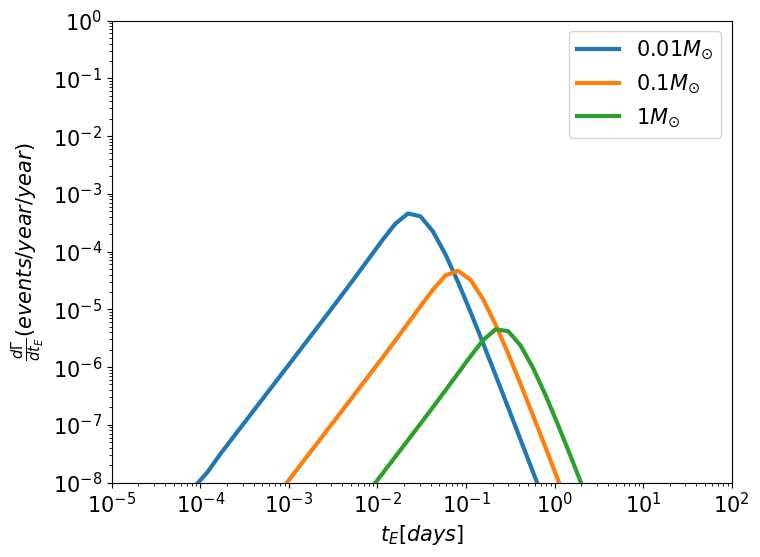

In [6]:
#@title Los maximos corresponden a la duración de eventos más probables.
plt.figure(figsize=(8,6))
ax = plt.axes()
plt.ylim(1e-8,1)
plt.xlim(1e-5,1e2)

plt.loglog(t_hat, rates[:,0], lw=3, label=str(round(m[0],2))+r'$M_{\odot}$')
plt.loglog(t_hat, rates[:,1], lw=3,label=str(round(m[1],2))+r'$M_{\odot}$')
plt.loglog(t_hat, rates[:,2], lw=3,label=str(round(m[2],2))+r'$M_{\odot}$')

plt.ylabel(r'$\frac{d\Gamma}{dt_E}(events/year/year)$',fontsize=15)
plt.xlabel(r'$t_E [days]$',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best' ,fontsize=15)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

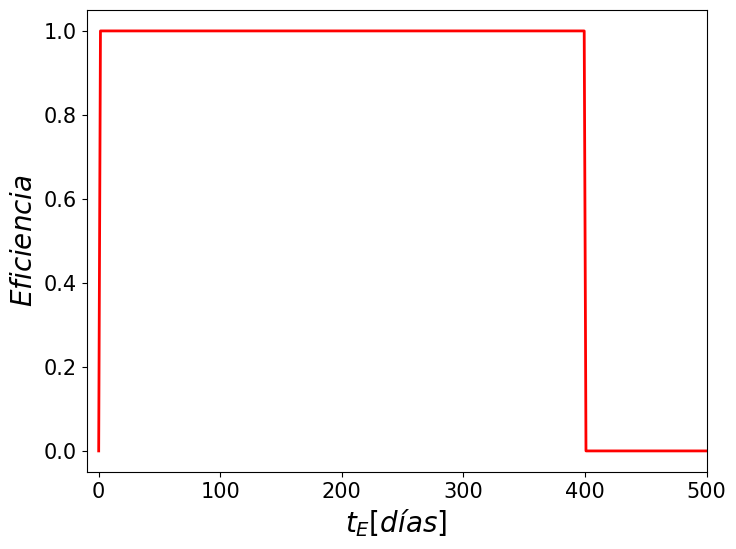

In [7]:
tE = np.linspace(0,365*2,500)

ef = [] 
for t in tE:
    if t<1e-2:
        ef.append(0)
    elif t>400:
        ef.append(0)
    else:
        ef.append(1)
plt.figure(figsize=(8,6))
plt.xlim(-10,500)
plt.plot(tE, ef, '-',color='red',lw=2)
plt.ylabel(r'$Eficiencia$',fontsize=20)
plt.xlabel(r'$t_E [días]$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Numero esperado de eventos

Integrando la tasa de eventos junto a la eficiencia, para todos los tiempos de cruce de Einstein posibles, y
considerando el número de estrellas observadas, se consigue el número esperado de eventos
\begin{equation}
    N_{exp} = E\int_0^{\infty} \mathcal{E}(\hat{t})\frac{d\Gamma}{d\hat{t}}d\hat{t} 
\end{equation}
Aquí $\mathcal{E}(\hat{t})$ es la eficiencia de detección, la cual, como se mencionó previamente, da la probabilidad de que en una observación particular se detecte un evento de microlente. $E=N_{\text{estrellas}} \times T_{\text{observación}}$ es la exposición, o sea, el número total de estrellas monitoreadas en un cierto tiempo (i.e. para las cuales se puede obtener la curva de luz). Para EROS-2 la exposición es $E_{LMC}=10^{7}$ estrellas-años.

In [8]:
t_hat = np.logspace(-10, 4,100)
M     = np.logspace(-10,10,100)

N = []
rates_int = np.zeros([len(t_hat),len(M)])
for j in tqdm(range(len(M))):
    for i in range(len(t_hat)):
        if t_hat[i]<1e-2:
            rates_int[i,j] = 0
        elif t_hat[i]>400:
            rates_int[i,j] = 0
        else:
            rates_int[i,j] = event_rate(t_hat[i],M[j])
    Nexp = simps(rates_int[:,j], t_hat)
    N.append(Nexp)
N = np.array(N)

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_6104/3061787595.py:14: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Nexp = simps(rates_int[:,j], t_hat)


Text(0, 0.5, 'N exp')

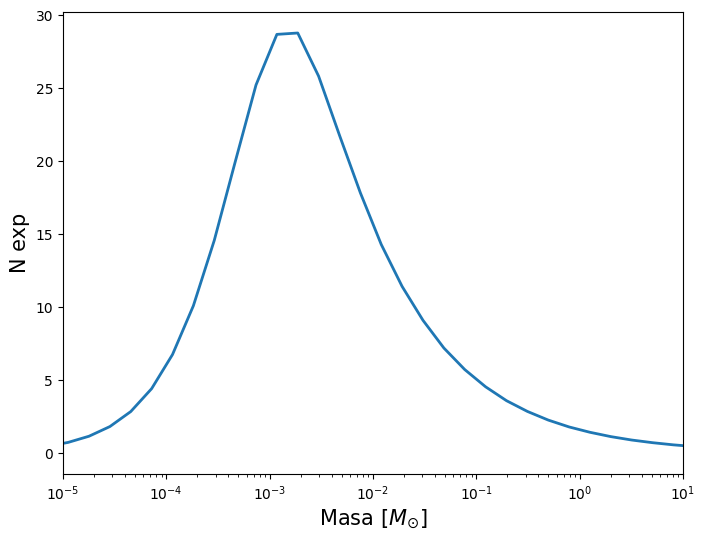

In [9]:
E =1e+6 #exposure (star-years)
plt.figure(figsize=(8,6))
plt.xlim(1e-5,1e1)
plt.semilogx(M,E*N, lw=2)
plt.xlabel(r'Masa $[M_{\odot}]$', fontsize=15)
plt.ylabel(r'N exp', fontsize=15)

# Limites en la fracción de materia oscura que pueden ser PBH
El método para obtener las cotas sobre la fracción de materia oscura que pueden ser PBH (DCO) se hace, suponiendo que los eventos detectados siguen una distribución de Poisson.

La probabilidad de observar un número $N_{obs}$ de eventos de microlente debido a DCO, sabiendo que $N_{exp}$ es el número de veces que se espera que ocurra el evento es
\begin{equation}
    P(N_{obs}|N_{exp}) = \frac{(N_{exp})^{N_{obs}}}{N_{obs}!}e^{-N_{exp}}\,.
\end{equation}
El número de eventos que contribuirán a los eventos producidos por objetos oscuros compactos del halo será una fracción del total $N_{exp}$, que fue el calculado en la sección anterior
\begin{equation}
    N_{exp}^{PBH} = f_{DM}N_{exp} \,.
\end{equation}
Dicho de otra forma, $f_{DM}$ es la fracción de la materia oscura que estará en la forma de DCO y se puede escribir como $f_{DM} = \frac{\Omega_{DCO}}{\Omega_{DM}}$, donde $\Omega_{DCO}$ es la fracción cosmológica de materia oscura en la forma objetos oscuros compactos y $\Omega_{DM}$ es la fracción total de materia oscura. 
 
A partir de la estimación del número esperado de eventos para cada masa se calcula la fracción más grande del halo en forma de objetos compactos que sea un $95\%$ compatible con la detección de $k$ eventos. Entonces, uno puede excluir la región de parámetros haciendo
\begin{equation}
    \sum_{k=0}^{N_{obs}} P(k|N_{exp}^{PBH})<0.05
\end{equation}
con un dado $N_{obs}$ correspondiente al $95\%$ de nivel de confianza.

Suponiendo que la observacion a LMC no detecto ningun evento asociado a un PBH el cual fue el caso EROS-2, un survey que realizó observaciones hacia LMC. Ese experimento no detectó ningún evento. La probabilidad de que eso ocurra es
\begin{equation}
    P(0|N_{exp}^{PBH}) = e^{-f_{DM}N_{exp}}.
\end{equation}
Los límites sobre $f_{DM}$ se obtienen pidiendo que $f_{DM}>f_{95CL}$ lo que implica que $P(0|N_{exp}^{PBH})<0.05$. Esta condición excluye $N_{exp}^{PBH}\gtrsim 3$ con un 95$\%$CL. Entonces calculamos el valor para el cual $f_{DM}=f_{95CL}$, en el caso de no haber observado eventos
\begin{equation}
    f_{95CL} = \frac{-\ln(0.05)}{N_{exp}} \approx \frac{3.0}{N_{exp}}.
\end{equation}


Text(0, 0.5, '$f=\\frac{\\Omega_{PBH}}{\\Omega_{DM}}$')

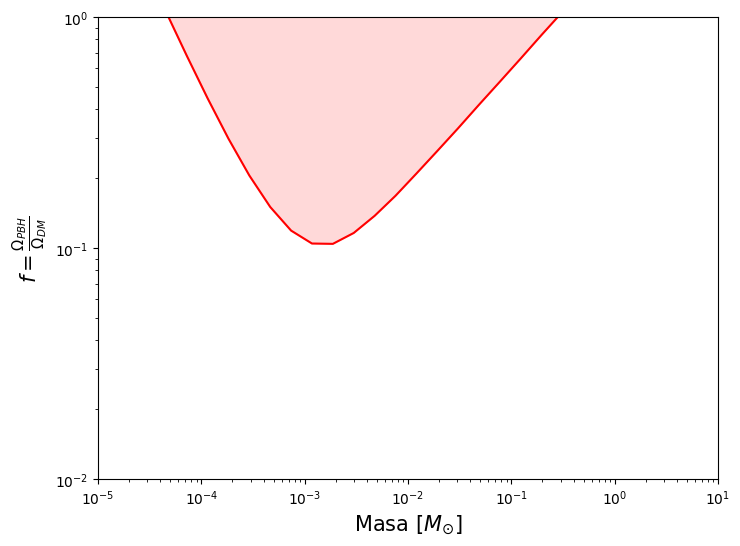

In [10]:
plt.figure(figsize=(8,6))
plt.ylim(1e-2,1)
plt.xlim(1e-5,1e1)
plt.loglog(M,3.0/(E*N),color='red')
plt.fill_between(M,3/(E*N),1,color='red', alpha=0.15)
plt.xlabel(r'Masa [$M_{\odot}$]', fontsize =15)
plt.ylabel(r'$f=\frac{\Omega_{PBH}}{\Omega_{DM}}$', fontsize =15)